# Algoritmos de Inversão

In [30]:
from typing import Callable
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm

# Caso Discreto

In [31]:
def probacumulada(p: np.ndarray) -> np.ndarray:
    """
        Dada uma função de probabilidade `p` que se supõem estar definida para eventos em {0, 1, ..., M-1} onde M é algum inteiro devolve a respetiva função de probabilidade acumulada.
    """

    # Calcular a probabilidade
    return np.array([sum(p[0:i+1]) for i in range(len(p))])

In [32]:
def invdiscreto(c: np.ndarray, N: int) -> np.ndarray:
    """
        Dada uma função de probabilidade acumulada `c` que se supõem estar definida para eventos em {0, 1, ..., M-1} onde M é algum inteiro devolve `N` amostras retiradas da respetiva distribuição usando o método da inversão no discreto.
    """
    
    # Resultados
    res = np.empty(N)
    for i in range(N):
        a = np.random.rand()
        res[i] = sum(c < a)
    
    return res

## Testar

In [33]:
# Lançamento de uma moeda
p1 = np.array([0.5, 0.5])
c1 = probacumulada(p1)

print(c1)

# Gerar uma amostra
a1 = invdiscreto(c1, 1000)

# Contar os resultados
s1 = np.array([sum(a1 == i) for i in range(len(p1))])
print(s1)

[0.5 1. ]
[502 498]


In [34]:
# Dado viciado
p2 = np.array([4, 2, 0, 0, 3, 1])
p2 = p2 / sum(p2)
c2 = probacumulada(p2)

print(c2)

# Gerar uma amostra
a2 = invdiscreto(c2, 1000)

# Contar os resultados
s2 = np.array([sum(a2 == i) for i in range(len(p2))])
print(s2)

[0.4 0.6 0.6 0.6 0.9 1. ]
[386 211   0   0 319  84]


# Caso Contínuo

In [35]:
def invcontinuo(cinv: Callable, N: int) -> np.ndarray:
    """
        Dada a inversa de uma função de probabilidade acumulada `cinv` devolve `N` amostras retiradas da respetiva distribuição usando o método da inversão no contínuo.
    """
    
    # Resultados
    res = np.empty(N)
    for i in range(N):
        a = np.random.rand()
        res[i] = cinv(a)
    
    return res

## Testar

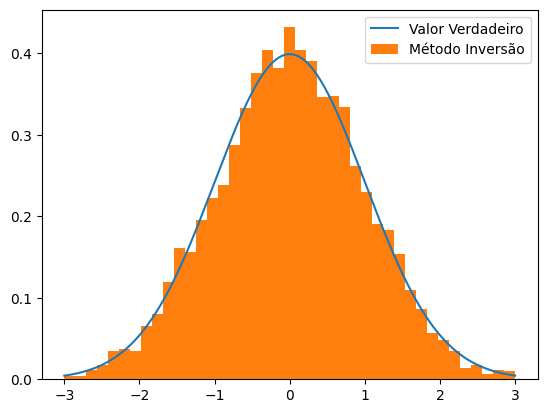

In [53]:
# Distribuição normal
pdf1 = norm.pdf
invcdf1 = norm.ppf

# Fazer amostragem
a = -3
b = 3
N = 4000
xx = np.linspace(a, b, N)
yy1 = pdf1(xx)
amostra = invcontinuo(invcdf1, N)

# Construir histograma
bins = int(N/100) + 1

plt.plot(xx, yy1, label="Valor Verdadeiro")
plt.hist(amostra, bins, range=(a, b), density=True, label="Método Inversão")
plt.legend()
plt.show()